# Linear models with two explanatory factor variables (Two-way analysis of variance)

本节需要的包：

In [1]:
require(s20x)
require(emmeans)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"
载入需要的程辑包：emmeans

Warning message:
"程辑包'emmeans'是用R版本4.2.3 来建造的"


## Example: Using test success and attendance to explain exam score

在第8章中，我们调查了一个学生的考试成绩对考试分数的影响是否取决于他们是否经常出席。我们发现那些经常出席的学生，比不出席者每多得到一分测试分数都有更高的“回报”。

In [2]:
## Importing data into R
Stats20x.df <- read.table("../data/STATS20x.txt", header = TRUE)
Stats20x.df$Attend <- factor(Stats20x.df$Attend)


We next transform the numeric `Test` variable into a factor with two levels, `pass` and `nopass`.

Let us create the new factor variable `Pass.test`:

In [3]:
Stats20x.df$Pass.test <- with(
    Stats20x.df,
    factor(ifelse(Test >= 10, "pass", "nopass"))
)
## Check to see if the call above does what we expect
min <- min(Stats20x.df$Test[Stats20x.df$Pass.test == "pass"])
max <- max(Stats20x.df$Test[Stats20x.df$Pass.test == "nopass"])
cat("min =", min, ", max =", max, "\n")


min = 10 , max = 9.1 


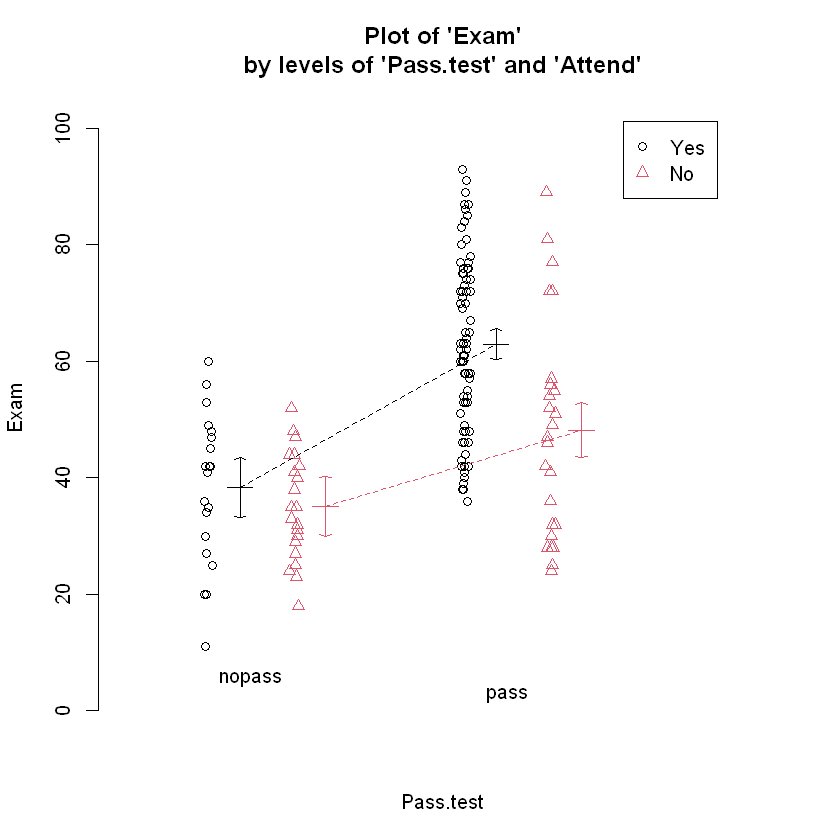

In [4]:
interactionPlots(Exam ~ Pass.test + Attend, data = Stats20x.df)


这里我们看到，“平时参与课堂”的通过测试似乎明显比大多数其他学生。请注意,我们没有平行线，从而表明可能有两个因素之间的交互。

如下所示，我们可以重新排列布局的互动情节逆转的顺序给出的解释变量是在右手边的模型公式参数。

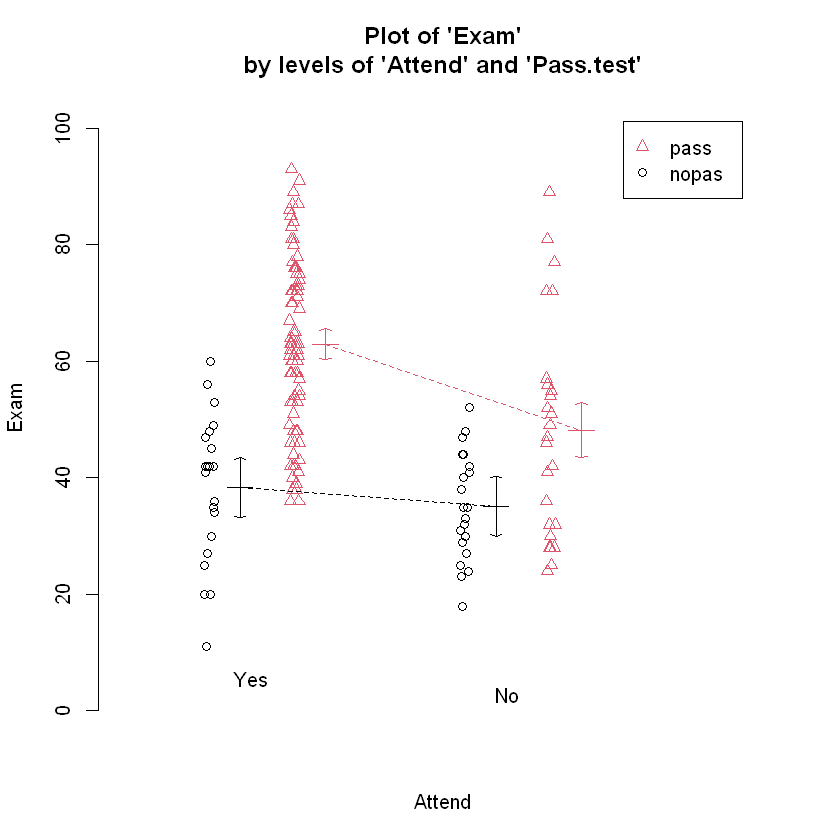

In [5]:
# 只是交换了下位置，但是图形不一样了
interactionPlots(Exam ~ Attend + Pass.test, data = Stats20x.df)


## Fitting the interaction model

Let us fit the model with interaction, and check the assumptions.

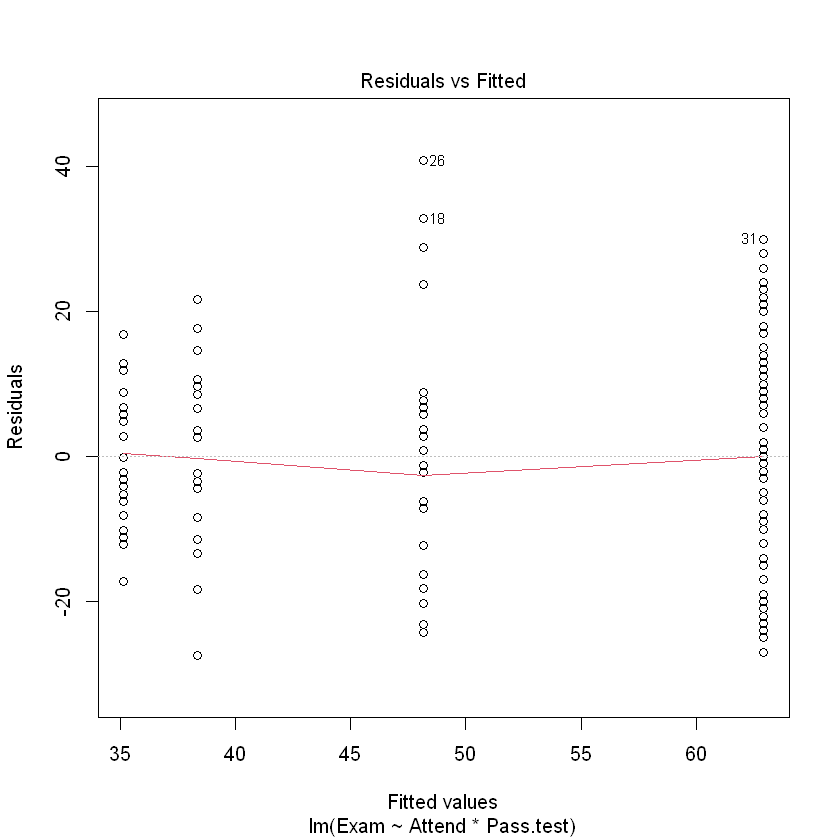

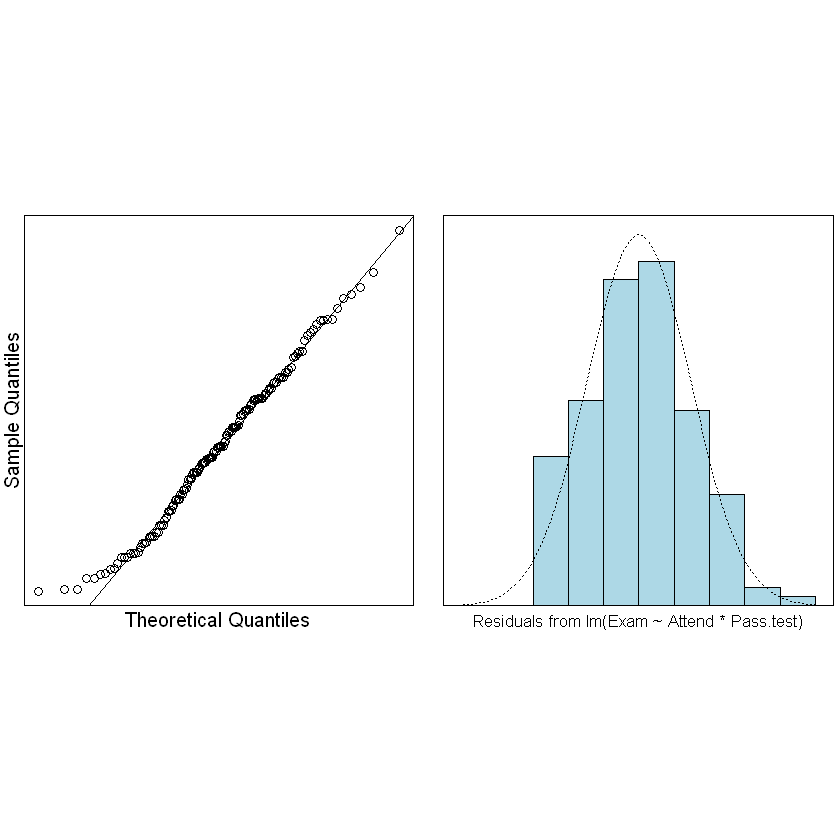

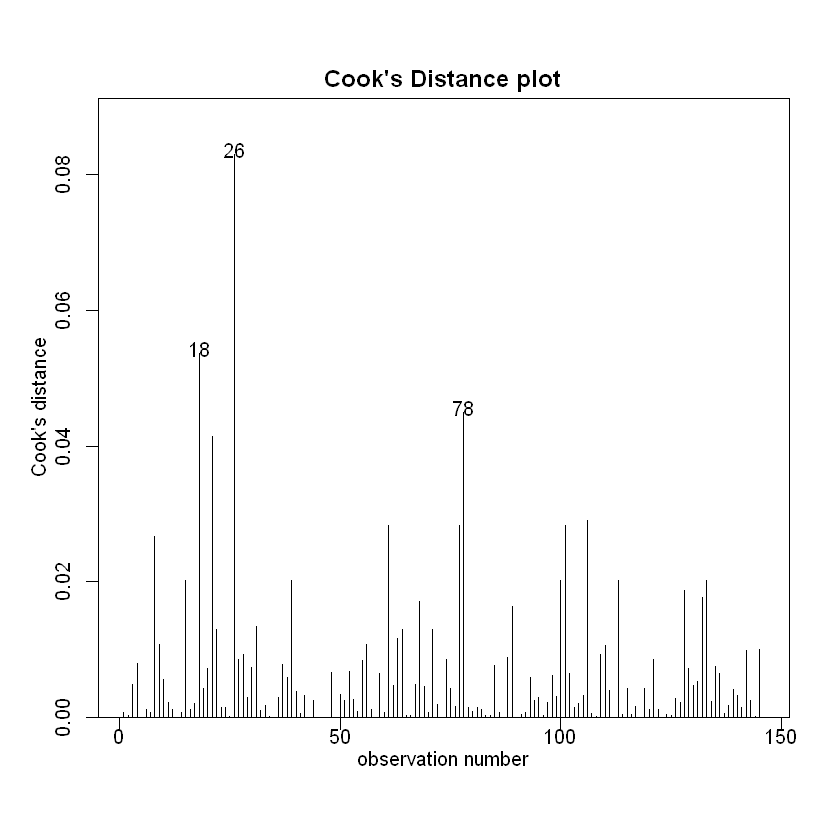

In [6]:
Exam.fit <- lm(Exam ~ Attend * Pass.test, data = Stats20x.df)
# 再来最后一次经典三步走（后面的内容基本就不是标准离散正态分布的数据了）
plot(Exam.fit, which = 1)
normcheck(Exam.fit)
cooks20x(Exam.fit)


No unduly influential data points.

We conclude that we can trust the output. Let us see what it is telling us. 我们得出结论，我们可以信任的输出。让我们看看它告诉我们什么。

In [7]:
anova(Exam.fit)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Attend,1,7630.7947,7630.7947,34.989635,2.364415e-08
Pass.test,1,11076.9380,11076.9380,50.791304,4.763017e-11
Attend:Pass.test,1,909.6526,909.6526,4.171048,4.297087e-02
Residuals,142,30968.3956,218.0873,NA,NA


附加：怎么通过这个算R方？


In [8]:
sum(anova(Exam.fit)$"Sum Sq"[1:3]) / sum(anova(Exam.fit)$"Sum Sq")


[1] 0.3878043

Let us investigate what our model tells us in terms of the estimated parameters:

In [9]:
summary(Exam.fit)



Call:
lm(formula = Exam ~ Attend * Pass.test, data = Stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.333 -10.893  -0.046   9.513  40.840 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               35.143      3.223  10.905  < 2e-16 ***
AttendYes                  3.190      4.557   0.700  0.48504    
Pass.testpass             13.017      4.371   2.978  0.00341 ** 
AttendYes:Pass.testpass   11.599      5.679   2.042  0.04297 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.77 on 142 degrees of freedom
Multiple R-squared:  0.3878,	Adjusted R-squared:  0.3749 
F-statistic: 29.98 on 3 and 142 DF,  p-value: 4.452e-15


The formula for the above two-way ANOVA can be written as:

$$
\begin{gathered}
Exam =\beta_{0}+\beta_{1}\times\text{Attend}_{Yes}+\beta_{2}\times\text{Pass.test}_{pass}+ \\
\beta_3\times\text{Attempt}_{yes}\times\text{Pass.test}_{pass}+\varepsilon 
\end{gathered}
$$

where and are indicator variables, and $\varepsilon\overset{iid}{\sim}N(0,\sigma^2)$.

如前一章所示，另一个选择是去除基线的和为-1的模型公式。其他的并发症之一是,我们必须使用,而不是在指定的交互项。

## Interpretting the output using pairwise differences

In [10]:
library(emmeans)
exam.pairs <- pairs(emmeans(Exam.fit, ~ Attend * Pass.test), infer = TRUE)
exam.pairs


 contrast               estimate   SE  df lower.CL upper.CL t.ratio p.value
 No nopass - Yes nopass    -3.19 4.56 142    -15.0     8.66  -0.700  0.8969
 No nopass - No pass      -13.02 4.37 142    -24.4    -1.65  -2.978  0.0178
 No nopass - Yes pass     -27.81 3.63 142    -37.2   -18.38  -7.669  <.0001
 Yes nopass - No pass      -9.83 4.37 142    -21.2     1.54  -2.248  0.1155
 Yes nopass - Yes pass    -24.62 3.63 142    -34.0   -15.19  -6.789  <.0001
 No pass - Yes pass       -14.79 3.39 142    -23.6    -5.98  -4.364  0.0001

Confidence level used: 0.95 
Conf-level adjustment: tukey method for comparing a family of 4 estimates 
P value adjustment: tukey method for comparing a family of 4 estimates 

## Example 2: Using gender and attendance to explain exam score

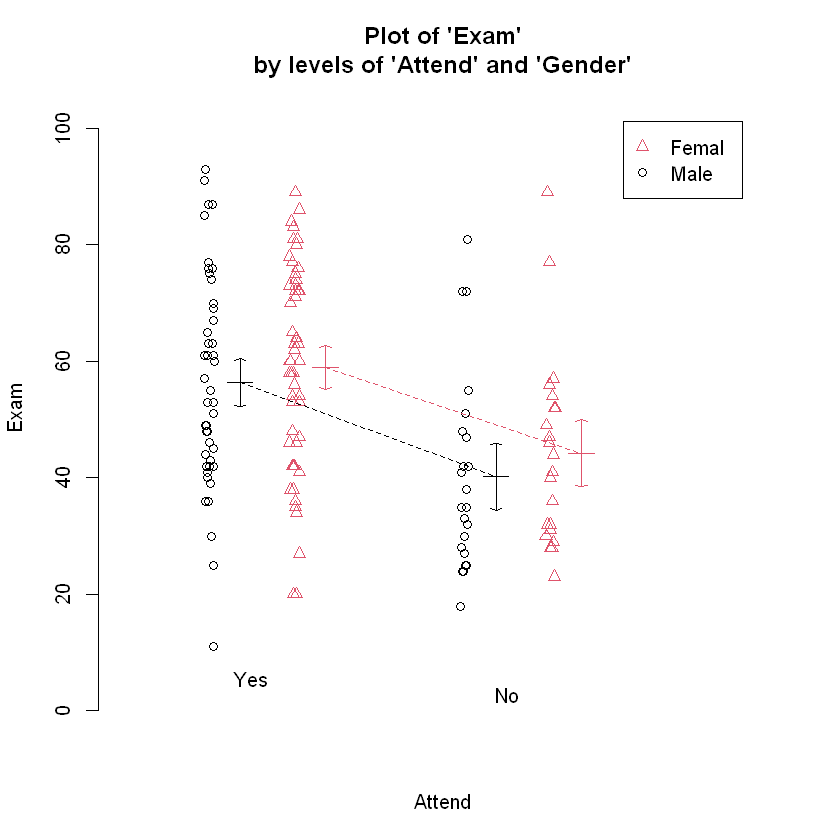

In [11]:
interactionPlots(Exam ~ Attend + Gender, data = Stats20x.df)


Let us fit an interaction model and check the assumptions.

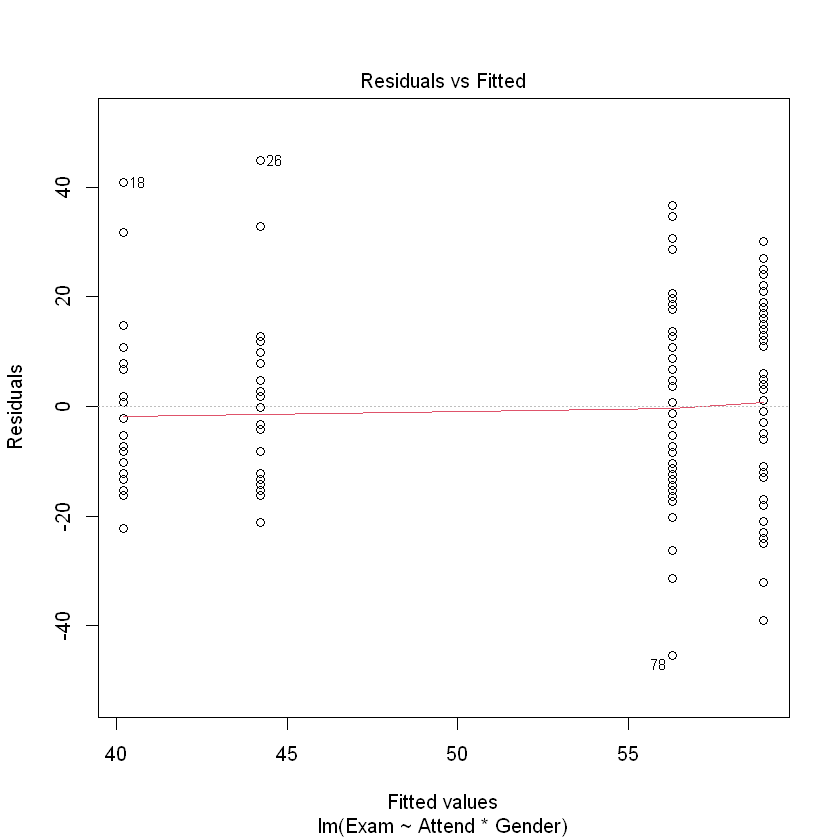

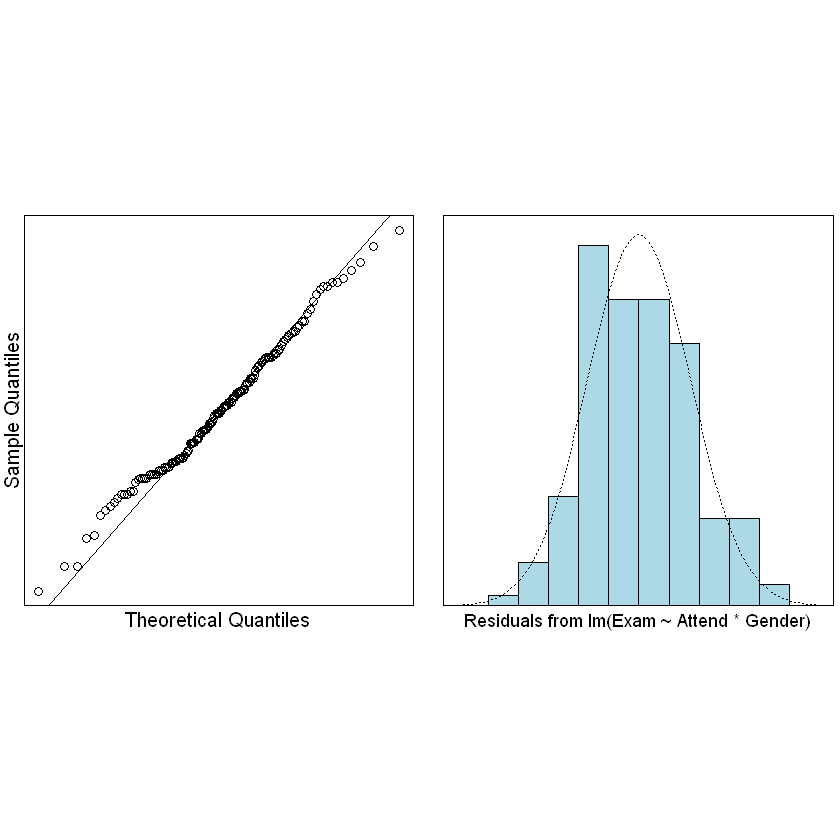

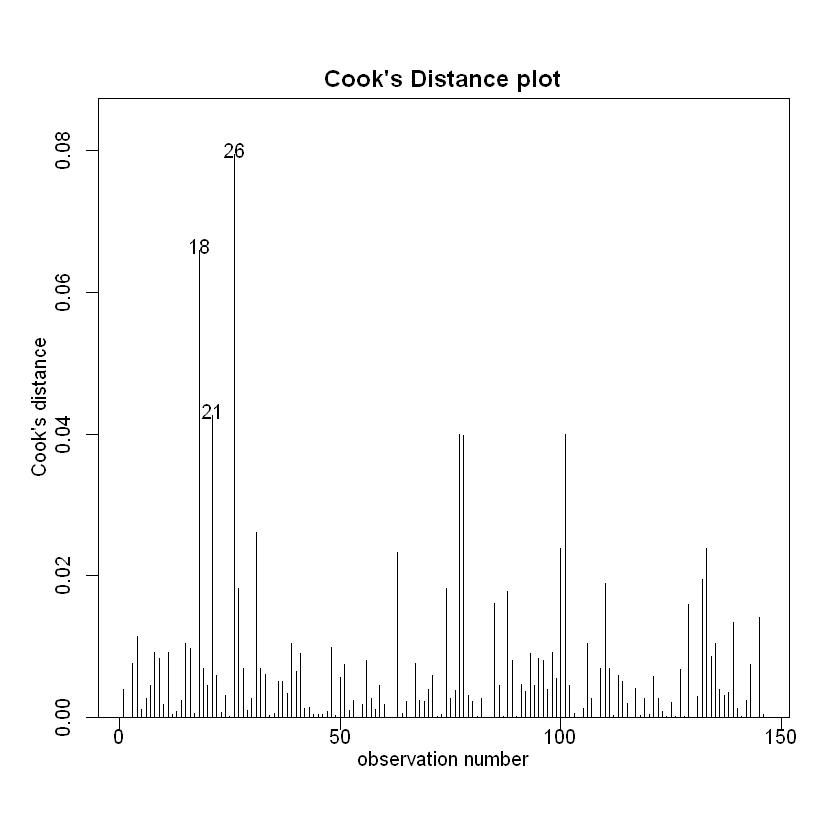

In [12]:
Exam.fit2 <- lm(Exam ~ Attend * Gender, data = Stats20x.df)
plot(Exam.fit2, which = 1)
normcheck(Exam.fit2)
cooks20x(Exam.fit2)


We can trust the model. Lets see what it is telling us.

In [13]:
anova(Exam.fit2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Attend,1,7630.79473,7630.79473,25.43929532,1.371947e-06
Gender,1,346.65959,346.65959,1.15568245,2.841860e-01
Attend:Gender,1,13.87415,13.87415,0.04625319,8.300248e-01
Residuals,142,42594.45235,299.96093,NA,NA


There is definitely no evidence of an interaction, so we’ll apply Occam’s razor and fit a simpler main-effects model (i.e., no interaction term). 这绝对是没有交互的证据，所以我们运用奥卡姆定律适合简单主效应模型(即没有交互项)。

In [14]:
Exam.fit3 <- lm(Exam ~ Attend + Gender, data = Stats20x.df)
anova(Exam.fit3)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Attend,1,7630.7947,7630.7947,25.610103,1.263935e-06
Gender,1,346.6596,346.6596,1.163442,2.825689e-01
Residuals,143,42608.3265,297.9603,NA,NA


We see that the gender is also not significant here, so we again apply Occam’s razor and remove this term.

In [15]:
Exam.fit4 <- lm(Exam ~ Attend, data = Stats20x.df)
summary(Exam.fit4)



Call:
lm(formula = Exam ~ Attend, data = Stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.780 -13.108  -0.217  12.642  46.783 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.217      2.547  16.578  < 2e-16 ***
AttendYes     15.563      3.077   5.058 1.27e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.27 on 144 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.145 
F-statistic: 25.58 on 1 and 144 DF,  p-value: 1.271e-06
